<a href="https://colab.research.google.com/github/ssvadla/Demonstration/blob/main/Semi_Light_AllData_Upsampling_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train1.head()

Mounted at /content/drive


,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [2]:
train = train1
train_list = [train2,train3,train4,train5,train6,train7,train8,train9,train10,train_highKappa]
for i in train_list:
  print(i)
  train = train.append(i)

      Unnamed: 0                                           Sentence    Target
0            659  Appellant had stated to the officers that she ...   Invalid
1           3456  We shall discuss the facts more fully in conne...    Others
2           2043  â€œPerjury is a false statement, either writte...   Invalid
3           3344  The offense is felony theft by false pretext; ...     Issue
4           3231  Numerous contentions urging the commission of ...     Issue
...          ...                                                ...       ...
3471        1561  Therefore, the deletion of reference to the Cl...  Analysis
3472         327  A paraffin test, which was made on the appella...  Analysis
3473        1462  The sole question presented is the sufficiency...     Facts
3474        1169  The answer was in response to the question ask...     Facts
3475        1470  The Stateâ€™s evidence shows that in the sprin...   Invalid

[3476 rows x 3 columns]
      Unnamed: 0                       

In [3]:
train.sort_values("Sentence", inplace = True)
print(len(train))

37711


In [4]:
 train = train.drop_duplicates(subset ="Sentence")

In [5]:
train['Target'].unique()


array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Others',
       'Conclusion', 'Issue'], dtype=object)

In [6]:
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [7]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)

In [9]:
train.columns

Index(['Unnamed: 0', 'Sentence', 'Target'], dtype='object')

In [10]:
type(train['Target'])

pandas.core.series.Series

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=660 (14.946%)
Class=5, n=332 (7.518%)
Class=2, n=2253 (51.019%)
Class=0, n=677 (15.331%)
Class=1, n=225 (5.095%)
Class=4, n=269 (6.091%)


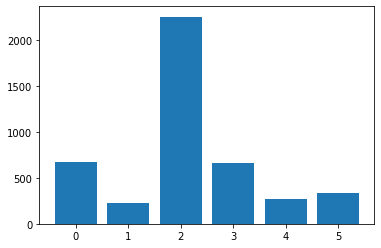

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [12]:
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(4416, 7374)


In [14]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,101,1013,1015,102,1020,1026,1030,104,1042,1044,105,10511,1056,1065,107,107c,1081,1084,1097,1099,10a,10acre,11,110,1102,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.111629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=2253 (16.667%)
Class=Rule/Law/Holding, n=2253 (16.667%)
Class=Facts, n=2253 (16.667%)
Class=Analysis, n=2253 (16.667%)
Class=Conclusion, n=2253 (16.667%)
Class=Issue, n=2253 (16.667%)


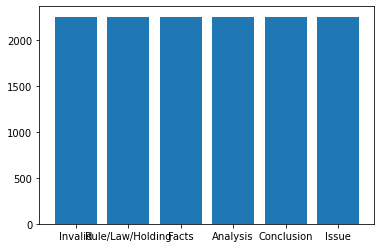

In [15]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [16]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

In [17]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn import svm


#X, y = make_classification(random_state=1)
counter = Counter(y)
print(counter)
#X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.26,random_state=42)
X_train, x_val, Y_train, y_val = train_test_split(X,y,test_size=0.26,random_state=42)

classifier = lgb.LGBMClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_val)
#print(np.unique(y_pred))
#print(type(y_pred))

Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation Accuracy_score: %f' % Accuracy_score)
test_pred = classifier.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Accuracy test data', acc_test)
classification_report = classification_report(test_pred,test['Target'],digits=4)
print(classification_report)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)


Counter({'Invalid': 2253, 'Rule/Law/Holding': 2253, 'Facts': 2253, 'Analysis': 2253, 'Conclusion': 2253, 'Issue': 2253})
Validation Accuracy_score: 0.876245
Accuracy test data 0.6333973128598849
                  precision    recall  f1-score   support

        Analysis     0.4026    0.4769    0.4366        65
      Conclusion     0.7692    0.6897    0.7273        29
           Facts     0.7266    0.7698    0.7476       252
         Invalid     0.6145    0.4048    0.4880       126
           Issue     0.4412    0.8333    0.5769        18
Rule/Law/Holding     0.5588    0.6129    0.5846        31

        accuracy                         0.6334       521
       macro avg     0.5855    0.6312    0.5935       521
    weighted avg     0.6416    0.6334    0.6293       521

[[466   7  40  12   7   8]
 [ 12 551   9   1   0   0]
 [ 39   6 467  69  14   8]
 [ 37   8  84 522   9  17]
 [  3   0   5   5 549   1]
 [  6   0  15   8   5 525]]


In [18]:
unlabel = pd.read_csv(r'/content/drive/My Drive/Research/Unlabeled_data.csv')
unlabel.head()

,Unnamed: 0,text,Complete
0,0,No motion for rehearing filed.,1
1,1,— Relator is under accusation of killing her h...,1
2,2,From an order of the District Judge of the 39t...,1
3,3,Relator and her husband had been married for a...,1
4,4,The evidence indicates that their family relat...,1


In [19]:
del unlabel['Complete']
del unlabel['Unnamed: 0']

In [20]:
unlabel.head()

,text
0,No motion for rehearing filed.
1,— Relator is under accusation of killing her h...
2,From an order of the District Judge of the 39t...
3,Relator and her husband had been married for a...
4,The evidence indicates that their family relat...


In [21]:
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [22]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
unlabel.head()

,text
0,motion rehearing filed
1,relator accusation killing husband virgil clark
2,order district judge 39th judicial district re...
3,relator husband married number year
4,evidence indicates family relation always plea...


In [24]:
len(unlabel)

537703

In [25]:
unlabel_1 = unlabel.loc[:100000]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = unlabel.loc[100001:200000]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = unlabel.loc[200001:300000]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = unlabel.loc[300001:400000]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = unlabel.loc[400001:]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 100001
length of unlabel_2 100000
length of unlabel_3 100000
length of unlabel_4 100000
length of unlabel_5 137702


In [26]:
unlabel_1.head()



,text
0,motion rehearing filed
1,relator accusation killing husband virgil clark
2,order district judge 39th judicial district re...
3,relator husband married number year
4,evidence indicates family relation always plea...


In [27]:

def index_reset(unlabel_2):
  unlabel_2.reset_index(inplace=True)
  del unlabel_2['index']
  print(unlabel_2.head())
  return unlabel_2

In [28]:
unlabel_1 = index_reset(unlabel_1)
unlabel_2 = index_reset(unlabel_2)
unlabel_3 = index_reset(unlabel_3)
unlabel_4 = index_reset(unlabel_4)
unlabel_5 = index_reset(unlabel_5)

                                                text
0                             motion rehearing filed
1    relator accusation killing husband virgil clark
2  order district judge 39th judicial district re...
3                relator husband married number year
4  evidence indicates family relation always plea...
                                                text
0  responding conclusion regarding evidence annou...
1  conviction transporting intoxicating liquor pu...
2                     bill exception case filed late
3  motion new trial overruled october 22 1927 ord...
4  thereafter december 10th extension order made ...
                                                text
0                       another man carrying clothes
1  officer testified appellant several item cloth...
2  investigation followed report breaking entry a...
3                                  appellant present
4  warrant arrest issued officer went hotel waite...
                                              

In [29]:
classifier.classes_

array(['Analysis', 'Conclusion', 'Facts', 'Invalid', 'Issue',
       'Rule/Law/Holding'], dtype=object)

In [30]:
Threshold = 0.98

In [31]:
x_un1 = tfidf_vect.transform(unlabel_1['text'])


In [32]:
x_un1.shape

(100001, 7374)

In [33]:

pred_unlabel_1 = classifier.predict_proba(x_un1)
pred_unlabel_1

array([[0.11952994, 0.11909783, 0.33141494, 0.38588493, 0.01067241,
        0.03339995],
       [0.04039913, 0.01307112, 0.24292063, 0.65933276, 0.03342084,
        0.01085553],
       [0.02332703, 0.05651352, 0.62814861, 0.23314532, 0.01189925,
        0.04696625],
       ...,
       [0.01216005, 0.13814845, 0.81455414, 0.03097654, 0.0019298 ,
        0.00223101],
       [0.03715391, 0.01391144, 0.35845206, 0.46795525, 0.00607601,
        0.11645133],
       [0.19982194, 0.01276321, 0.41805869, 0.35317878, 0.00590421,
        0.01027316]])

In [34]:
print(len(pred_unlabel_1))
print(np.unique(pred_unlabel_1))

100001
[5.19107325e-05 7.13496332e-05 8.32391948e-05 ... 9.96596227e-01
 9.96923759e-01 9.97131768e-01]


In [35]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_1:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 5, 2, 2, 2, 2, 1, 1, 5, 1, 4, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 2, 1, 4, 1, 1, 1, 5, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 2, 1, 1, 2, 5, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 5, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 5, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 

In [36]:
unlabel_1 = unlabel_1.loc[pos,:]
print(len(unlabel_1))
unlabel_1.head()

1866


,text
63,reason stated judgment reversed cause remanded
91,error indicated judgment trial court reversed ...
137,reason heretofore given judgment reversed caus...
145,error pointed judgment trial court reversed ca...
225,finding reversible error judgment affirmed


In [37]:
class_x_un1 = tfidf_vect.transform(unlabel_1['text'])

In [38]:
class_x_un1.shape

(1866, 7374)

In [39]:
class_pred_unlabel_1 = classifier.predict(class_x_un1)
class_pred_unlabel_1

array(['Conclusion', 'Conclusion', 'Conclusion', ..., 'Facts',
       'Conclusion', 'Conclusion'], dtype=object)

In [40]:
print(len(class_pred_unlabel_1))

1866


In [41]:
class_x_un1.shape

(1866, 7374)

In [42]:
type(class_pred_unlabel_1)

numpy.ndarray

In [43]:
unlabel_1.columns

Index(['text'], dtype='object')

In [44]:
len(unlabel_1['text'])

1866

In [45]:
type(unlabel_1['text'])

pandas.core.series.Series

In [46]:
unlabel_1['Target']=class_pred_unlabel_1
unlabel_1.head()

,text,Target
63,reason stated judgment reversed cause remanded,Conclusion
91,error indicated judgment trial court reversed ...,Conclusion
137,reason heretofore given judgment reversed caus...,Conclusion
145,error pointed judgment trial court reversed ca...,Conclusion
225,finding reversible error judgment affirmed,Conclusion


In [47]:
class_x_un1_new = tfidf_vect.transform(unlabel_1['text'])

In [48]:
class_x_un1_new.shape

(1866, 7374)

In [49]:
unlabel_1.shape

(1866, 2)

In [50]:
X_tfidf = tfidf_vect.transform(unlabel_1['text'])
print(X_tfidf.shape)

(1866, 7374)


In [51]:
train.head()

,Unnamed: 0,Sentence,Target
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1833,185,"""... that nowhere in the statute was it stated...",Invalid
2431,415,"""Although a statute may be neither vague, over...",Rule/Law/Holding
2245,416,"""For even when pursuing a legitimate interest,...",Rule/Law/Holding
1561,25,"""If an indictment has been found or accusation...",Facts


In [52]:
train.shape

(4416, 3)

In [53]:
unlabel_1.head()

,text,Target
63,reason stated judgment reversed cause remanded,Conclusion
91,error indicated judgment trial court reversed ...,Conclusion
137,reason heretofore given judgment reversed caus...,Conclusion
145,error pointed judgment trial court reversed ca...,Conclusion
225,finding reversible error judgment affirmed,Conclusion


In [54]:
train = train.rename(columns={'Sentence':'text'})
train.head()

,Unnamed: 0,text,Target
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1833,185,"""... that nowhere in the statute was it stated...",Invalid
2431,415,"""Although a statute may be neither vague, over...",Rule/Law/Holding
2245,416,"""For even when pursuing a legitimate interest,...",Rule/Law/Holding
1561,25,"""If an indictment has been found or accusation...",Facts


In [55]:
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)
print(len(train))
print(len(unlabel_1))
print(len(train_1))

4416
1866
6282


In [56]:
train_1.columns

Index(['Unnamed: 0', 'text', 'Target'], dtype='object')

In [57]:
train_1.sort_values("text", inplace = True)
train_1 = train_1.drop_duplicates(subset ="text")

In [58]:
print(len(train_1))

5273


In [59]:
type(train_1['Target'])

pandas.core.series.Series

[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=678 (12.858%)
Class=5, n=368 (6.979%)
Class=2, n=2811 (53.309%)
Class=0, n=706 (13.389%)
Class=1, n=408 (7.738%)
Class=4, n=302 (5.727%)
total 5273


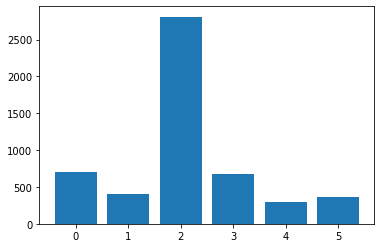

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_1.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
total =0
for k,v in counter.items():
  total = total+v
  per = v / len(y) * 100
  print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
print("total",total)
pyplot.show()

In [61]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_1['text'])
print(X_tfidf.shape)

(5273, 8363)


In [62]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,101,1013,1015,102,1020,1026,1030,104,1042,1044,105,10511,1056,1065,107,107c,1081,1084,1097,1099,10a,10acre,10th,11,110,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.115009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=2811 (16.667%)
Class=Rule/Law/Holding, n=2811 (16.667%)
Class=Facts, n=2811 (16.667%)
Class=Analysis, n=2811 (16.667%)
Class=Conclusion, n=2811 (16.667%)
Class=Issue, n=2811 (16.667%)


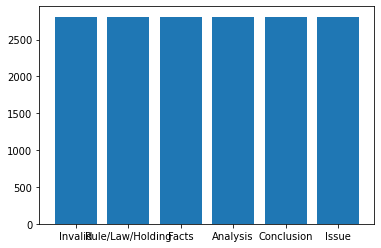

In [63]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_1['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [64]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

In [65]:
from sklearn.metrics import classification_report
#x_train_1 = tfidf_vect.transform(train_1['text'])
#x_train_1.shape
#X_train, x_val, Y_train, y_val = train_test_split(x_train_1,train_1['Target'],test_size=0.25,random_state=2)
X_train, x_val, Y_train, y_val = train_test_split(X,y,test_size=0.26,random_state=42)
classifier_1 = lgb.LGBMClassifier()
classifier_1.fit(X_train, Y_train)
y_pred = classifier_1.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_1.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

['Analysis' 'Conclusion' 'Facts' 'Invalid' 'Issue' 'Rule/Law/Holding']
<class 'numpy.ndarray'>
Validation ------- Accuracy_score: 0.905837
Test ------Accuracy score  0.5930902111324377
[[644   9  40  11   6  10]
 [ 11 742   6   2   1   3]
 [ 37   9 592  54   9  10]
 [ 29  12  63 639   8  19]
 [  2   1  11  13 664   1]
 [  6   2  12   7   9 692]]
---------validation--------------
                  precision    recall  f1-score   support

        Analysis       0.89      0.88      0.89       729
      Conclusion       0.97      0.96      0.96       775
           Facts       0.83      0.82      0.83       724
         Invalid       0.83      0.88      0.85       726
           Issue       0.96      0.95      0.96       697
Rule/Law/Holding       0.95      0.94      0.95       735

        accuracy                           0.91      4386
       macro avg       0.91      0.91      0.91      4386
    weighted avg       0.91      0.91      0.91      4386

----------test---------------------

In [66]:
x_un2 = tfidf_vect.transform(unlabel_2['text'])


In [67]:

pred_unlabel_2 = classifier_1.predict_proba(x_un2)
pred_unlabel_2

array([[2.65263747e-03, 9.92624936e-01, 2.33540353e-03, 1.01898182e-03,
        3.54606938e-04, 1.01343408e-03],
       [2.24953498e-02, 2.86455412e-03, 1.60805683e-02, 1.04770044e-02,
        1.04626675e-01, 8.43455848e-01],
       [7.21191794e-02, 5.11847609e-03, 8.52471208e-01, 4.71804632e-02,
        5.14647839e-03, 1.79641946e-02],
       ...,
       [5.59937111e-02, 1.21887247e-02, 6.73098491e-01, 1.99395395e-01,
        4.06866173e-02, 1.86370612e-02],
       [2.04932735e-02, 6.83714473e-03, 5.52046775e-01, 3.90461880e-01,
        2.29659549e-02, 7.19497240e-03],
       [8.62933408e-02, 1.31388167e-02, 4.95081082e-01, 3.53840368e-01,
        3.86349095e-02, 1.30114830e-02]])

In [68]:
print(len(pred_unlabel_2))
print(np.unique(pred_unlabel_2))

100000
[3.19964044e-05 3.42999224e-05 3.48702605e-05 ... 9.99063244e-01
 9.99218765e-01 9.99476562e-01]


In [69]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_2:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 5, 1, 1, 2, 2, 2, 2, 4, 2, 5, 1, 1, 2, 2, 2, 5, 4, 5, 1, 2, 1, 5, 1, 0, 2, 2, 1, 1, 2, 1, 1, 5, 2, 1, 4, 1, 1, 2, 1, 0, 4, 1, 1, 1, 1, 2, 2, 0, 1, 1, 5, 4, 2, 2, 1, 5, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5, 1, 5, 1, 1, 2, 1, 2, 2, 3, 2, 2, 1, 2, 1, 1, 1, 5, 4, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 4, 1, 1, 2, 5, 2, 2, 2, 3, 1, 1, 5, 1, 2, 5, 2, 4, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 5, 1, 1, 1, 1, 3, 1, 1, 5, 4, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 4, 4, 1, 2, 2, 5, 0, 5, 2, 1, 1, 1, 2, 1, 1, 4, 1, 2, 2, 1, 1, 5, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 5, 2, 5, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 

In [70]:
unlabel_2 = unlabel_2.loc[pos,:]
print(len(unlabel_2))
unlabel_2.head()

2636


,text
0,responding conclusion regarding evidence annou...
25,established without question injured party sus...
39,finding reversible error judgment trial court ...
89,finding reversible error record judgment affirmed
108,finding error record judgment affirmed


In [71]:
class_x_un2 = tfidf_vect.transform(unlabel_2['text'])

In [72]:
class_x_un1.shape

(1866, 7374)

In [73]:
class_pred_unlabel_2 = classifier_1.predict(class_x_un2)
class_pred_unlabel_2

array(['Conclusion', 'Facts', 'Conclusion', ..., 'Conclusion',
       'Conclusion', 'Conclusion'], dtype=object)

In [74]:
print(len(class_pred_unlabel_2))

2636


In [75]:
unlabel_2['Target']=class_pred_unlabel_2
unlabel_2.head()

,text,Target
0,responding conclusion regarding evidence annou...,Conclusion
25,established without question injured party sus...,Facts
39,finding reversible error judgment trial court ...,Conclusion
89,finding reversible error record judgment affirmed,Conclusion
108,finding error record judgment affirmed,Conclusion


In [76]:
train_1.head()

,Unnamed: 0,text,Target
1364,239.0,"""(I)n the First Amendment area 'government may...",Invalid
1833,185.0,"""... that nowhere in the statute was it stated...",Invalid
2431,415.0,"""Although a statute may be neither vague, over...",Rule/Law/Holding
2245,416.0,"""For even when pursuing a legitimate interest,...",Rule/Law/Holding
1561,25.0,"""If an indictment has been found or accusation...",Facts


In [77]:
frame_2 = [train_1,unlabel_2]
train_2 = pd.concat(frame_2)
print(len(train_1))
print(len(unlabel_2))
print(len(train_2))

5273
2636
7909


In [78]:
train_2.sort_values("text", inplace = True)
train_2 = train_2.drop_duplicates(subset ="text")
print(len(train_2))


7030


[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=717 (10.199%)
Class=5, n=543 (7.724%)
Class=2, n=3820 (54.339%)
Class=0, n=746 (10.612%)
Class=1, n=814 (11.579%)
Class=4, n=390 (5.548%)
total 7030


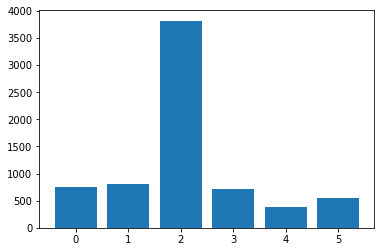

In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_2.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
total =0
for k,v in counter.items():
  total = total+v
  per = v / len(y) * 100
  print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
print("total",total)
pyplot.show()

In [80]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_2['text'])
print(X_tfidf.shape)

(7030, 9649)


In [81]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,02,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,101,1013,1015,102,1020,1026,1030,104,1042,1044,105,10511,1056,1065,107,107c,1081,1084,1097,1099,10a,10acre,10th,11,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.120107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=3820 (16.667%)
Class=Rule/Law/Holding, n=3820 (16.667%)
Class=Facts, n=3820 (16.667%)
Class=Analysis, n=3820 (16.667%)
Class=Conclusion, n=3820 (16.667%)
Class=Issue, n=3820 (16.667%)


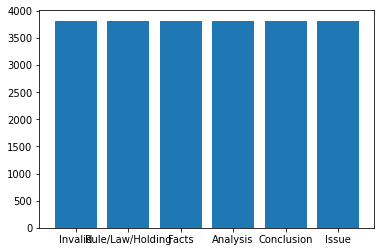

In [82]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_2['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [83]:
t_p = tfidf_vect.transform(test['Sentence'])

In [84]:
from sklearn.metrics import classification_report
x_train_2 = tfidf_vect.transform(train_2['text'])
x_train_2.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_2,train_2['Target'],test_size=0.25,random_state=2)
classifier_2 = lgb.LGBMClassifier()
classifier_2.fit(X_train, Y_train)
y_pred = classifier_2.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_2.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

['Analysis' 'Conclusion' 'Facts' 'Invalid' 'Issue' 'Rule/Law/Holding']
<class 'numpy.ndarray'>
Validation ------- Accuracy_score: 0.765074
Test ------Accuracy score  0.6161228406909789
[[ 78   9  22  10  12  12]
 [  7 160   3   3   1   2]
 [ 79  25 913  78  26  22]
 [ 18   6  25  71   3   7]
 [  2   0   3   2  47   3]
 [ 12   1   6  10   4  76]]
---------validation--------------
                  precision    recall  f1-score   support

        Analysis       0.55      0.40      0.46       196
      Conclusion       0.91      0.80      0.85       201
           Facts       0.80      0.94      0.86       972
         Invalid       0.55      0.41      0.47       174
           Issue       0.82      0.51      0.63        93
Rule/Law/Holding       0.70      0.62      0.66       122

        accuracy                           0.77      1758
       macro avg       0.72      0.61      0.65      1758
    weighted avg       0.75      0.77      0.75      1758

----------test---------------------

In [85]:
x_un3 = tfidf_vect.transform(unlabel_3['text'])


In [86]:

pred_unlabel_3 = classifier_2.predict_proba(x_un3)
pred_unlabel_3

array([[0.03859839, 0.00970191, 0.64458769, 0.271038  , 0.00796272,
        0.02811129],
       [0.01646243, 0.00213283, 0.93933942, 0.03208083, 0.00443445,
        0.00555005],
       [0.03916988, 0.00657426, 0.88118724, 0.0513258 , 0.01843588,
        0.00330694],
       ...,
       [0.02387453, 0.03375996, 0.48279003, 0.03905465, 0.06120599,
        0.35931485],
       [0.02339565, 0.00785506, 0.89210627, 0.06423823, 0.00558231,
        0.00682248],
       [0.02680836, 0.01025365, 0.43951926, 0.45578619, 0.01086394,
        0.05676859]])

In [87]:
print(len(pred_unlabel_2))
print(np.unique(pred_unlabel_2))

100000
[3.19964044e-05 3.42999224e-05 3.48702605e-05 ... 9.99063244e-01
 9.99218765e-01 9.99476562e-01]


In [88]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_3:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[2, 2, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 1, 5, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 5, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 5, 2, 5, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 4, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 4, 5, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 5, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 2, 2, 0, 5, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 5, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 1, 2, 1, 2, 2, 5, 

In [89]:
unlabel_3 = unlabel_3.loc[pos,:]
print(len(unlabel_3))
unlabel_3.head()

6721


,text
10,crossexamination captain johnson testified wen...
12,trial court properly overruled appellant reque...
51,error pointed judgment reversed cause remanded
60,reason indicated judgment reversed cause remanded
100,judgment trial court affirmed


In [90]:
class_x_un3 = tfidf_vect.transform(unlabel_3['text'])

In [91]:
class_x_un3.shape

(6721, 9649)

In [92]:
class_pred_unlabel_3 = classifier_2.predict(class_x_un3)
class_pred_unlabel_3

array(['Facts', 'Facts', 'Conclusion', ..., 'Conclusion', 'Conclusion',
       'Conclusion'], dtype=object)

In [93]:
print(len(class_pred_unlabel_3))

6721


In [94]:
unlabel_3['Target']=class_pred_unlabel_3
unlabel_3.head()

,text,Target
10,crossexamination captain johnson testified wen...,Facts
12,trial court properly overruled appellant reque...,Facts
51,error pointed judgment reversed cause remanded,Conclusion
60,reason indicated judgment reversed cause remanded,Conclusion
100,judgment trial court affirmed,Conclusion


In [95]:
train_2.head()

,Unnamed: 0,text,Target
1364,239.0,"""(I)n the First Amendment area 'government may...",Invalid
1833,185.0,"""... that nowhere in the statute was it stated...",Invalid
2431,415.0,"""Although a statute may be neither vague, over...",Rule/Law/Holding
2245,416.0,"""For even when pursuing a legitimate interest,...",Rule/Law/Holding
1561,25.0,"""If an indictment has been found or accusation...",Facts


In [96]:
frame_3 = [train_2,unlabel_3]
train_3 = pd.concat(frame_3)
print(len(train_2))
print(len(unlabel_3))
print(len(train_3))

7030
6721
13751


In [97]:
train_3.sort_values("text", inplace = True)
train_3 = train_3.drop_duplicates(subset ="text")
print(len(train_3))


12584


[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=881 (7.001%)
Class=5, n=755 (6.000%)
Class=2, n=8040 (63.891%)
Class=0, n=778 (6.182%)
Class=4, n=710 (5.642%)
Class=1, n=1420 (11.284%)
total 12584


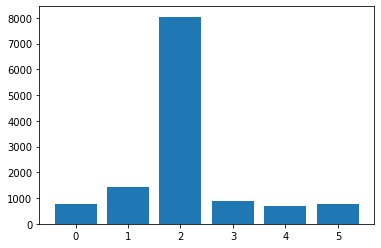

In [98]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_3.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
total =0
for k,v in counter.items():
  total = total+v
  per = v / len(y) * 100
  print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
print("total",total)
pyplot.show()

In [99]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_3['text'])
print(X_tfidf.shape)

(12584, 13177)


In [100]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,00100,015,02,1,10,100,1000,10000,100000,1000000,10000000,10000â,1000x22,1005,1006,1008,1008a,100x22,101,1010,1013,1015,102,1020,1026,1030,104,1042,1044,104545,105,1050,10511,1056,1065,107,107c,1081,1084,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.133841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_3['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
t_p = tfidf_vect.transform(test['Sentence'])

In [ ]:
from sklearn.metrics import classification_report
x_train_3 = tfidf_vect.transform(train_3['text'])
x_train_3.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_3,train_3['Target'],test_size=0.25,random_state=2)
classifier_3 = lgb.LGBMClassifier()
classifier_3.fit(X_train, Y_train)
y_pred = classifier_3.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))

Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_3.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

In [ ]:
x_un4 = tfidf_vect.transform(unlabel_4['text'])


In [ ]:

pred_unlabel_4 = classifier_3.predict_proba(x_un4)
pred_unlabel_4

In [ ]:
print(len(pred_unlabel_2))
print(np.unique(pred_unlabel_2))

In [ ]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_4:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

In [ ]:
unlabel_4 = unlabel_4.loc[pos,:]
print(len(unlabel_4))
unlabel_4.head()

In [ ]:
class_x_un4 = tfidf_vect.transform(unlabel_4['text'])

In [ ]:
class_x_un4.shape

In [ ]:
class_pred_unlabel_4 = classifier_3.predict(class_x_un4)
class_pred_unlabel_4

In [ ]:
print(len(class_pred_unlabel_4))

In [ ]:
unlabel_4['Target']=class_pred_unlabel_4
unlabel_4.head()

In [ ]:
train_3.head()

In [ ]:
frame_4 = [train_3,unlabel_4]
train_4 = pd.concat(frame_4)
print(len(train_3))
print(len(unlabel_4))
print(len(train_4))
train_4

In [ ]:
train_4.sort_values("text", inplace = True)
train_4 = train_4.drop_duplicates(subset ="text")
print(len(train_4))


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_4.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
total =0
for k,v in counter.items():
  total = total+v
  per = v / len(y) * 100
  print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
print("total",total)
pyplot.show()

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_4['text'])
print(X_tfidf.shape)

In [ ]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_4['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
t_p = tfidf_vect.transform(test['Sentence'])

In [ ]:
from sklearn.metrics import classification_report
x_train_4 = tfidf_vect.transform(train_4['text'])
x_train_4.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_4,train_4['Target'],test_size=0.25,random_state=2)
classifier_4 = lgb.LGBMClassifier()
classifier_4.fit(X_train, Y_train)
y_pred = classifier_4.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_4.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

In [ ]:
x_un5 = tfidf_vect.transform(unlabel_5['text'])


In [ ]:
x_un5.shape

In [ ]:
pred_unlabel_5 = classifier_4.predict_proba(x_un5)
pred_unlabel_5

In [ ]:
print(len(pred_unlabel_5))
print(np.unique(pred_unlabel_5)) 

In [ ]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_5:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

In [ ]:
unlabel_5 = unlabel_5.loc[pos,:]
print(len(unlabel_5))
unlabel_5.head()

In [ ]:
class_x_un5 = tfidf_vect.transform(unlabel_5['text'])

In [ ]:
class_x_un5.shape

In [ ]:
class_pred_unlabel_5 = classifier_4.predict(class_x_un5)
class_pred_unlabel_5

In [ ]:
print(len(class_pred_unlabel_5))

In [ ]:
unlabel_5['Target']=class_pred_unlabel_5
unlabel_5.head()

In [ ]:
train_4.head()


In [ ]:
print(len(train_4))

In [ ]:
frame_5 = [train_4,unlabel_5]
train_5 = pd.concat(frame_5)
print(len(train_4))
print(len(unlabel_5))
print(len(train_5))

In [ ]:
train_5.sort_values("text", inplace = True)
train_5 = train_5.drop_duplicates(subset ="text")
print(len(train_5))

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_5.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
total =0
for k,v in counter.items():
  total = total+v
  per = v / len(y) * 100
  print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
print("total",total)
pyplot.show()

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_5['text'])
print(X_tfidf.shape)

In [ ]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_5['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
t_p = tfidf_vect.transform(test['Sentence'])

In [ ]:
from sklearn.metrics import classification_report
x_train_5 = tfidf_vect.transform(train_5['text'])
x_train_5.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_5,train_5['Target'],test_size=0.25,random_state=2)
classifier_5 = lgb.LGBMClassifier()
classifier_5.fit(X_train, Y_train)
y_pred = classifier_5.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_5.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))